In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV

/Users/sam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../data/creditcard.csv')

### Correlations

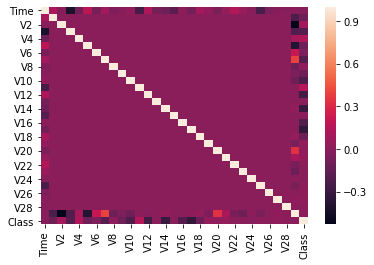

In [3]:
sns.heatmap(df.corr())

In [4]:
df.corr().Class

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

### Feature engineering

In [5]:
df_mod = df
df_mod['V14_17'] = df_mod.V14 * df_mod.V17
df_mod['V_7_16'] = df_mod.V7 * df_mod.V16
df_mod['V3_12'] = df_mod.V3 * df_mod.V12
# df_mod = df_mod.drop(['V14', 'V17' , 'V7', 'V16', 'V3', 'V12'], axis=1)

In [6]:
df_mod.corr().Class

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
V14_17    0.542507
V_7_16    0.322361
V3_12     0.523055
Name: Class, dtype: float64

### X/y and train/test splits (engineered and non-engineered sets)

In [7]:
X = df.drop('Class', axis=1)
y = df.Class

X_mod = df_mod.drop('Class', axis=1)
y_mod = df_mod.Class

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(X_mod, y_mod, stratify=y_mod, random_state=42)


### Modeling

##### 'Control' model for comparison w feature engineering

In [18]:
rfc_control = RandomForestClassifier(random_state=1)
rfc_control.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [19]:
y_pred_control = rfc_control.predict(X_test)
print(classification_report(y_test, y_pred_control))
print(f1_score(y_test, y_pred_control))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.77      0.85       123

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202

0.8482142857142856


In [ ]:
class_names = ['not fruad', 'fraud']
disp = plot_confusion_matrix(rfc_control, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
disp.ax_.set_title('Confusion Matrix RFC-Control results')

print(title)
print(disp.confusion_matrix)

### Feature engineered RFC results

In [20]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train_mod, y_train_mod)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [21]:
y_pred = rfc.predict(X_test_mod)
print(classification_report(y_test_mod, y_pred))
print(f1_score(y_test_mod, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.77      0.85       123

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202

0.8482142857142856


Confusion Matrix RFC-Control results
[[71075     4]
 [   27    96]]


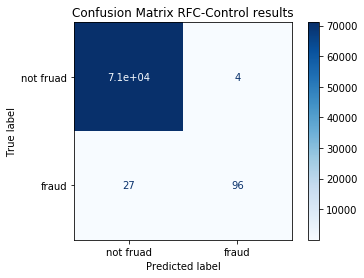

In [17]:
class_names = ['not fruad', 'fraud']
title = 'Confusion Matrix RFC-Control results'
disp = plot_confusion_matrix(rfc, X_test_mod, y_test_mod,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

In [47]:
df_mod.corr().Class

Time     -0.012323
V1       -0.101347
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V13      -0.004570
V15      -0.004223
V16      -0.196539
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Class     1.000000
V14_17    0.542507
V3_12     0.523055
V2_4      0.134381
Name: Class, dtype: float64

In [33]:
y_pred = pd.Series(y_pred)
y_pred.index = y_test.index
indices = y_test.index

In [36]:
TP = []
FP = []
FN = []
for true, pred, index in zip(y_test, y_pred, indices):
    if (true==1) and (true==pred):
        TP.append(index)
    if (true==0) and (pred==1):
        FP.append(index)
    if (true==1) and (pred==0):
        FN.append(index)
        

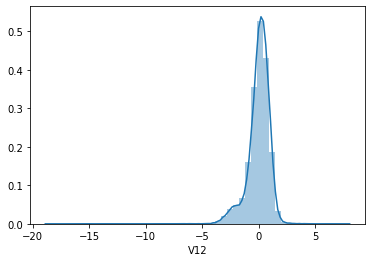

In [45]:
sns.distplot(df_mod.V12)

# Additional PCA

In [22]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_mod)

In [23]:
pd.DataFrame(X_pca)

,0,1,2,3,4
0,94813.862875,55.975645,-1.738343,0.136001,1.077063
1,94813.854639,-90.953756,-0.056110,0.480190,-0.550755
2,94812.875656,285.009827,-2.789866,-2.310261,-1.351501
3,94812.861396,29.857557,-0.431785,-0.246507,-0.268527
4,94811.858409,-23.653278,0.122502,-0.203047,-0.438876
...,...,...,...,...,...
284802,-77972.145256,-83.281064,-13.469030,-7.587091,26.115526
284803,-77973.143806,-59.205426,1.658521,-0.192261,-0.924079
284804,-77974.141490,-16.117994,0.183241,0.091002,-0.343445
284805,-77974.144651,-73.995572,0.574523,0.301960,1.200468


In [24]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_mod, stratify=y_mod, random_state=42)

In [25]:
rfc_pca = RandomForestClassifier(random_state=1)
rfc_pca.fit(X_train_pca, y_train_pca)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [26]:
y_pred_pca = rfc_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_pca))
print(f1_score(y_test_pca, y_pred_pca))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.80      0.87       123

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202

0.868421052631579
